In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

Cargamos Todos los datos 

In [3]:
#VIH
url = 'https://www.indexmundi.com/map/?v=35&l=es'
html = requests.get(url).content
VIH = pd.read_html(html)[2]

In [4]:
#Birth_rate
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&l=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)[2]

In [110]:
path_ll_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000Lluv.csv'
path_Mx_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMax.csv'
path_Mm_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMin.csv'
path_Md_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMed.csv'
path_ll_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201905010000Lluv.csv'
path_Mx_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMax.csv'
path_Mm_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMin.csv'
path_Md_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMed.csv'

In [111]:
lluvias_2018 = pd.read_csv(path_ll_18,encoding='latin-1')
Maxima_2018 = pd.read_csv(path_Mx_18,encoding='latin-1')
Minima_2018 = pd.read_csv(path_Mm_18,encoding='latin-1')
Media_2018 = pd.read_csv(path_Md_18,encoding='latin-1')
lluvias_2018 = lluvias_2018.rename(columns={'LON':'Lon','LAT':'Lat','ESTADO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','ENE':'Ene/18'}) 
lluvias_2019 = pd.read_csv(path_ll_19,encoding='latin-1')
Maxima_2019 = pd.read_csv(path_Mx_19,encoding='latin-1')
Minima_2019 = pd.read_csv(path_Mm_19,encoding='latin-1')
Media_2019 = pd.read_csv(path_Md_19,encoding='latin-1')
lluvias_2019 = lluvias_2019.rename(columns={'LON':'Lon','LAT':'Lat','EDO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','MAY':'May/19'})

In [112]:
#Combinamos las tablas en una sola base de datos:
T_2018 = pd.merge(pd.merge(Media_2018,Maxima_2018),Minima_2018)
T_2019 = pd.merge(pd.merge(Media_2019,Maxima_2019),Minima_2019)
Temperatura = pd.concat([T_2018, T_2019], keys=['2018', '2019'],sort=False)[['Lon', 'Lat', 'Edo', 'Clave', 'Est', 'Tmed','Tmax','Tmin']]

In [113]:
lluvias = pd.merge(lluvias_2018,lluvias_2019)

In [114]:
#Datos de mancahas solares
path_sp = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/sunspots.txt'

In [115]:
sunspots = np.loadtxt(path_sp,skiprows=4, unpack=True)

# Simple Line Plots

In [116]:
year, num= np.reshape(sunspots[::2],(1,300))[0],np.reshape(sunspots[1::2],(1,300))[0]

(0.0, 190.2)

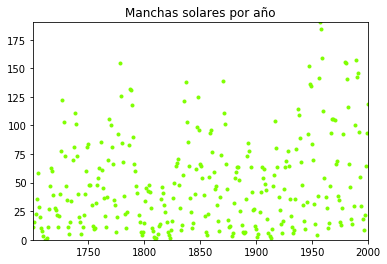

In [117]:
plt.plot(year,num,'.',color='chartreuse')
plt.title("Manchas solares por año")
plt.xlim(np.min(year),np.max(year))
plt.ylim(np.min(num),np.max(num))

In [118]:
x = np.arange(-1,1,0.1)
y = np.exp(-x**2)

Text(0.5,1,'Exponencial')

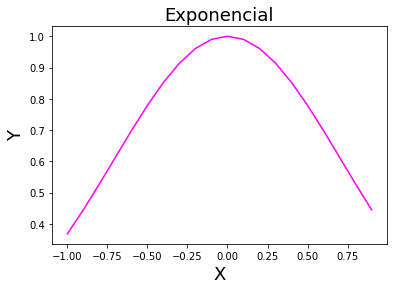

In [14]:
plt.figure()
plt.plot(x,y,color = 'magenta')
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18)

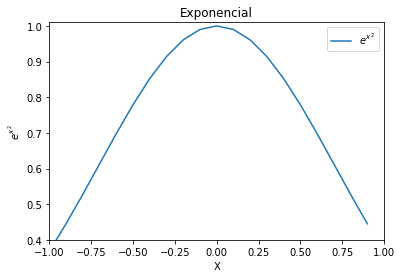

In [15]:
ax = plt.axes()
ax.plot(x,y,label='$e^{x^{2}}$')
ax.set(xlim=(-1,1), ylim=(0.4, 1.01),xlabel='X', ylabel='$e^{x^{2}}$',title='Exponencial')
plt.legend();

# Simple Scatter Plots

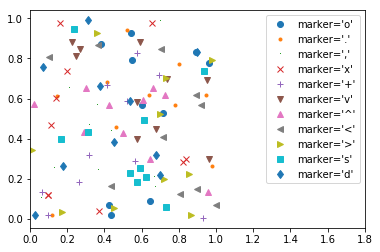

In [16]:
#Copio y pego para ver como funciona
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(10), rng.rand(10), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

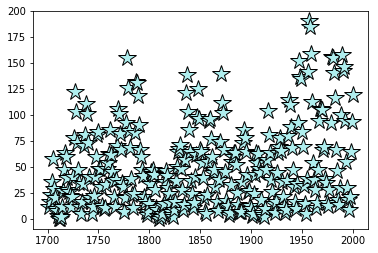

In [17]:
#Muestro los puntos de las manchas solares con más estilo:
plt.plot(year, num, '*',
         markersize=18, #tamaño de los puntos 
         markerfacecolor='paleturquoise', #color de relleno
         markeredgecolor='k', # color del contorno
         markeredgewidth=1); # Grosor del contorno 

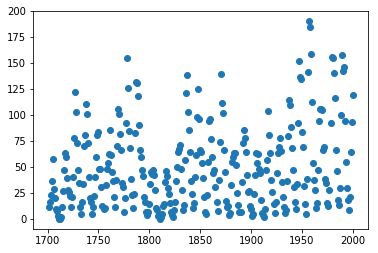

In [18]:
#Ahora lo hacemos con plt.scatter
plt.scatter(year,num);

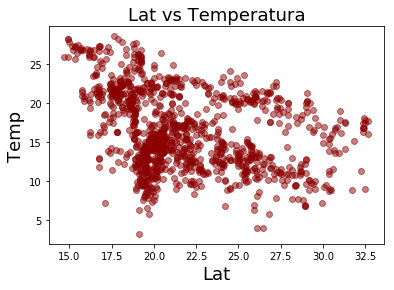

In [19]:
# Veoms Como varia la teperatura con la latitud
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

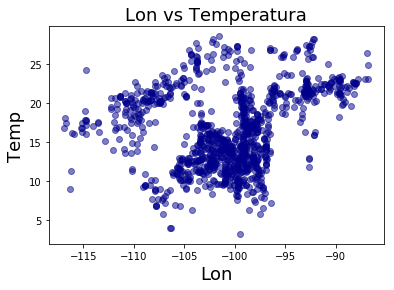

In [20]:
# Veoms Como varia la teperatura con la Longitud
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

# Visualizing Errors

In [21]:
 rnd = np.random.RandomState()

In [22]:
err_y = rnd.rand(len(y))*0.1 #producimos el error de Y en forma random

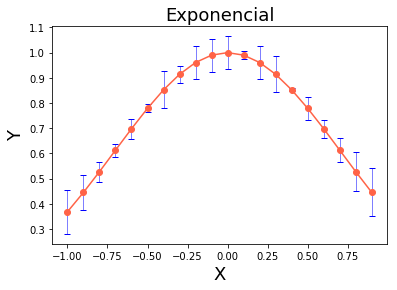

In [23]:
plt.errorbar(x, y, yerr=err_y, fmt='o-', color = 'tomato',
            ecolor = 'blue',
            elinewidth = 0.5,
            capsize = 3)
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18);

# Density and Contour Plots

In [24]:
def f(x,y):
    return np.sin(np.abs(y)**x)*np.cos(np.abs(x)**y)

In [25]:
x_1 = np.linspace(-np.pi,np.pi,100)
y_1 = np.linspace(-3*np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x_1, y_1)

In [26]:
Z = f(X,Y)

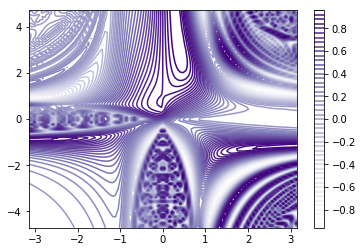

In [27]:
# Con Controur
plt.contour(X, Y, Z,
            50, #espesificar contas lineas se crearan
            cmap='Purples') #color de las lineas
plt.colorbar();

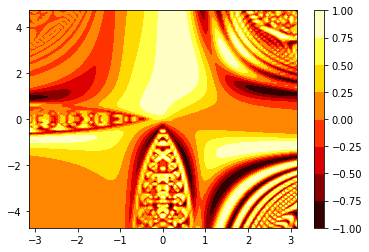

In [28]:
# Con Controurf
plt.contourf(X, Y, Z,
            cmap='hot') #color de las lineas
plt.colorbar();

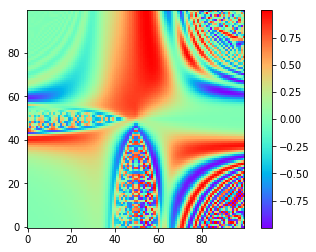

In [29]:
# Con imshow
plt.imshow(Z,origin='lower',cmap='rainbow')
plt.colorbar()
plt.axis(aspect='imagen');

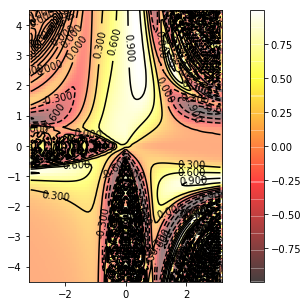

In [30]:
#Podemos convinar las tecnicas para graficar
plt.figure(figsize=(10,5))
graf = plt.contour(X, Y, Z, 6, colors = 'black') #Los limites que aparescan los ponemos como limites en imshow
plt.clabel(graf, inline=True, fontsize=10)
plt.imshow(Z,extent=[-3.2,3.2, -4.5, 4.5],
           origin='lower', #Ponemos lower de lo contrario la gráfica saldrá invertida
           cmap='hot', 
           alpha=0.5) # degradado
plt.colorbar();

# Histograms, Binnings, and Density

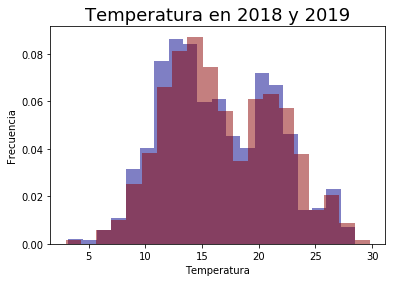

In [31]:
#Histograma de temperaturas medias de 2018
plt.hist(np.array(Temperatura['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkblue')
#Histograma de temperaturas medias de 2019
plt.hist(np.array(Temperatura['Tmed'][:'2019']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkred')
plt.title('Temperatura en 2018 y 2019',fontsize =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia');

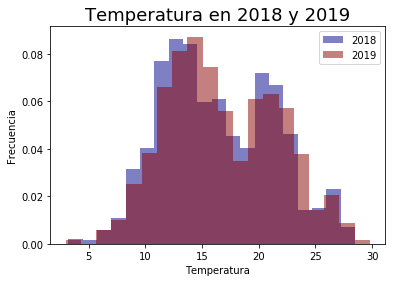

In [32]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=20)

plt.hist(np.array(Temperatura['Tmed'][:'2018']),color='darkblue',**tun,label='2018')
plt.hist(np.array(Temperatura['Tmed'][:'2019']),color='darkred',**tun,label='2019')
plt.title('Temperatura en 2018 y 2019',fontsize  =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.legend();

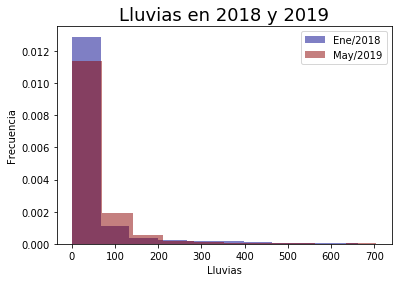

In [33]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=10)

plt.hist(np.array(lluvias['Ene/18']),color='darkblue',**tun,label='Ene/2018')
plt.hist(np.array(lluvias['May/19']),color='darkred',**tun,label='May/2019')
plt.title('Lluvias en 2018 y 2019',fontsize  =18)
plt.xlabel('Lluvias')
plt.ylabel('Frecuencia')
plt.legend();

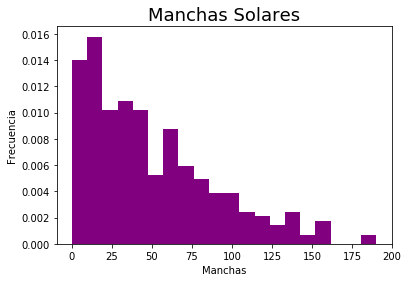

In [34]:
#Histograma de lluvias
plt.hist(num, density=True, bins=20, color='purple')
plt.title('Manchas Solares',fontsize  =18)
plt.xlabel('Manchas')
plt.ylabel('Frecuencia');

In [35]:
#Para solo obtener los dato del Histograma (Frecuecia por cada bin)
F,b = np.histogram(num,bins=20)
print(F) 
print(b) #separación de los bins

[40 45 29 31 29 15 25 17 14 11 11  7  6  4  7  2  5  0  0  2]
[  0.     9.51  19.02  28.53  38.04  47.55  57.06  66.57  76.08  85.59
  95.1  104.61 114.12 123.63 133.14 142.65 152.16 161.67 171.18 180.69
 190.2 ]


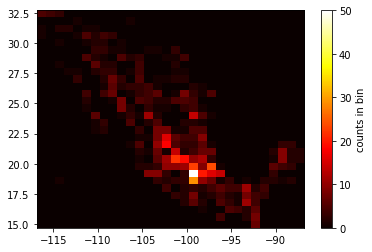

In [36]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en la temperatura
plt.hist2d(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

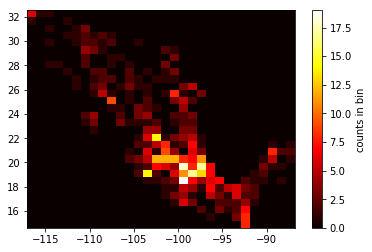

In [37]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en las lluvias
plt.hist2d(np.array(lluvias['Lon']), np.array(lluvias['Lat']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

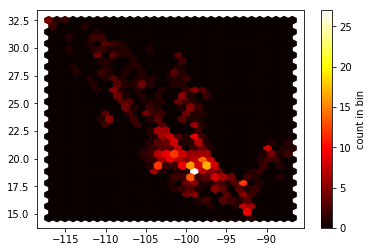

In [38]:
plt.hexbin(np.array(lluvias['Lon']), np.array(lluvias['Lat']), gridsize=30, cmap='hot')
plt.colorbar(label='count in bin');

# Customizing Plot Legends

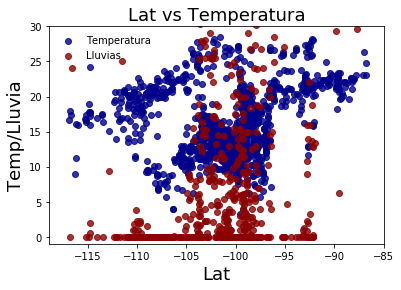

In [60]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']), marker='o', color = 'darkblue', alpha = 0.8,label = 'Temperatura')
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']), marker='o', color = 'darkred',  alpha = 0.8, label = 'Lluvias')
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp/Lluvia',fontsize = 18)
plt.ylim(-1,30)
plt.legend(loc='upper left', frameon=False);

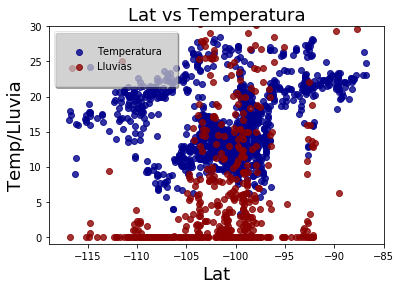

In [72]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']), marker='o', color = 'darkblue', alpha = 0.8,label = 'Temperatura')
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']), marker='o', color = 'darkred',  alpha = 0.8, label = 'Lluvias')
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp/Lluvia',fontsize = 18)
plt.ylim(-1,30)
plt.legend(loc='upper left', fancybox=True, framealpha=0.5, shadow=True, borderpad=1.5);

In [219]:
#Agregamos una columna asignando un número a cada estado para despues graficarlos de distinto color
Temperatura['n'] = 0
guar = []
i = 1
for mark in Temperatura['Edo']:
    if mark in guar:
        pass
    else:
        Temperatura.loc[(Temperatura['Edo']== mark),'n'] = i
        i = i+1
    guar.append(mark)

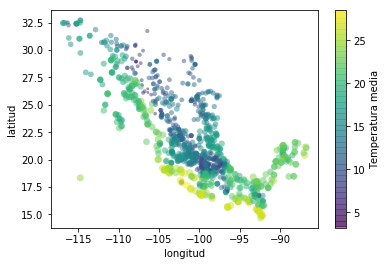

In [245]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.array(Temperatura['Tmed'][:'2018']), cmap='viridis',
            s=2*np.array(Temperatura['Tmed'][:'2018']), linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='Temperatura media');

In [259]:
Temperatura['n'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

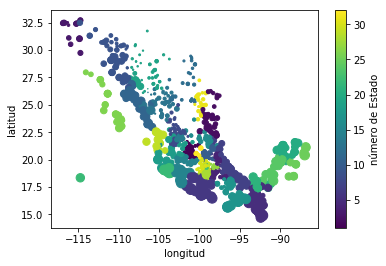

In [278]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.array(Temperatura['n'][:'2018']), cmap='viridis',
            s = 0.005*np.power(np.array(Temperatura['Tmed'][:'2018']),3),
            alpha=1)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='número de Estado');

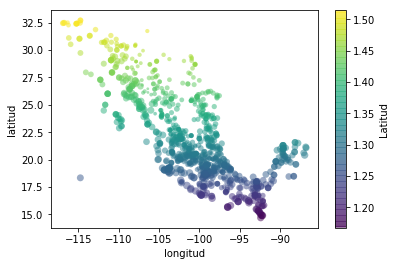

In [269]:
plt.scatter(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), label=None,
            c=np.log10(np.abs(np.array(Temperatura['Lat'][:'2018']))), cmap='viridis',
            s=2*np.array(Temperatura['Tmed'][:'2018']), linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.colorbar(label='Latitud');

# Customizing Colorbars

# Multiple Subplots

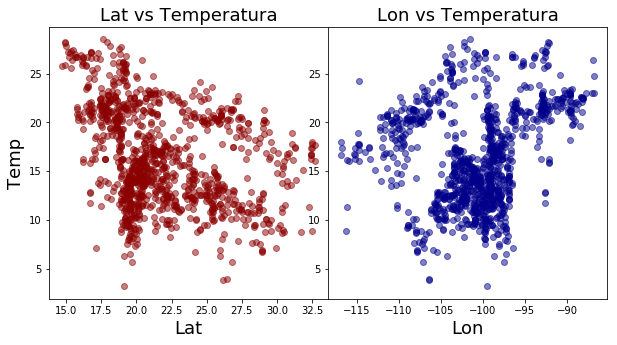

In [337]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=1, wspace=0)
plt.subplot(1,2,1)
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18)
plt.subplot(1,2,2)
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.show()

In [365]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

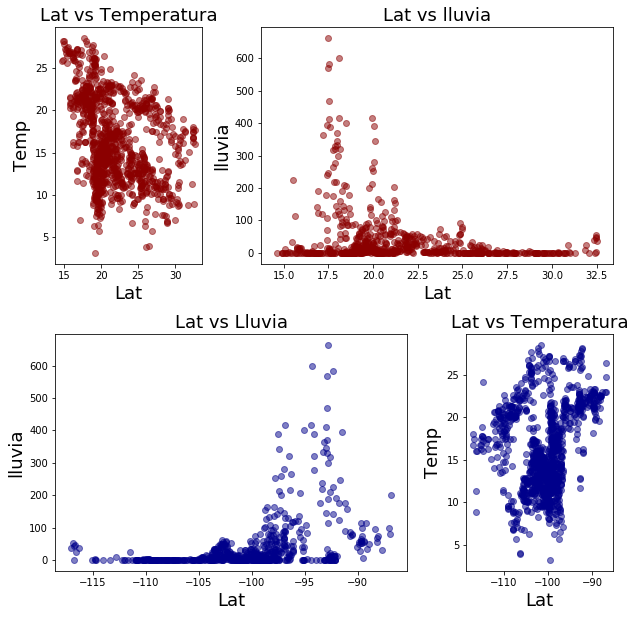

In [366]:
fig = plt.figure(figsize=(10,10))
#fig.subplots_adjust(hspace=0, wspace=0)
plt.subplot(grid[0, 0])
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18)
plt.subplot(grid[0, 1:])
plt.scatter(np.array(lluvias['Lat']),np.array(lluvias['Ene/18']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs lluvia',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('lluvia',fontsize = 18)
plt.subplot(grid[1, :2])
plt.scatter(np.array(lluvias['Lon']),np.array(lluvias['Ene/18']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lat vs Lluvia',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('lluvia',fontsize = 18)
plt.subplot(grid[1, 2])
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);